# This project was developed as a pre-interview exercise for a ML Internship. 
by [Charalampos Spanias](https://github.com/CSpanias) on the 23rd of December 2021.

The dataset was given with no additional information and/or metadata.

The exercise specifications were the following:  

<img src="https://raw.githubusercontent.com/CSpanias/data_intern_ex/main/Machine%20Learning%20Intern%20Role/ML_exercise_specifications.PNG" height=10% width=60% align="left">

# Content

 1. [Problem Framing](#ProblemFraming)
 2. [Performance Measure](#PerfMeasure)
 3. [Loading Data](#LoadingData)
 4. [Creating a Test Set](#TestSet)
 5. [Exploratory Data Analysis](#EDA)
 6. [Data Cleaning](#DataCleaning)
 7. [Selecting and Training Various Models](#SelectTrainModel)
 8. [Selecting Best Model and Tuning Hyperparameters](#BestModel)
 9. [Evalute on the Test Set](#TestSetEval)
 10. [Conclusions](#Conclusions)

<a name="ProblemFraming"> </a>
# 1. Problem Framing

* Supervised problem, i.e. labeled data.
* Multiple & univariate regression problem, i.e. using multiple features to make a single value prediction.
* Batch learning, i.e. use of all data.

<a name="PerfMeasure"> </a>
# 2. Performance Measure
* How much error the system typically makes in its predictions
* Root Mean Square Error (RMSE) or Mean Absolute Error (MAE)
* RMSE more sensitive to outliers than MAE

<a name="LoadingData"> </a>
# 3. Loading the Data

In [1]:
import pandas as pd

# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/CSpanias/data_intern_ex/main/Machine%20Learning%20Intern%20Role/cancer_reg.csv?token=AS2O4BVMSXAOE5545MPDEU3BYPEUS", encoding='latin-1')

# print the first 5 rows of the dataset
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


Some things to notice:
1. there are 34 columns in total: **33 features** and 1 Target variable.
2. the scales of those features are different.
3. all features but *binnedInc* are numerical, which seems like a categorical variable.

We will need to address both 2 and 3 later on.

In [2]:
# print some basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

Some things to notice:
1. *binnedInc*, *Geography* columns are of type object.
2. Three columns have missing values: *PctSomeCol18_24* (762/3047), *PctEmployed16_Over* (2985/3047), *PctPrivateCoverageAlone* (2438/3047).
3. The dataset is fairly "small": 3047 rows x 34 columns.

We will have to address both 1 and 2 later on.

In [3]:
# check how many categories there are for "binnedInc"
df['binnedInc'].value_counts()

(54545.6, 61494.5]    306
[22640, 34218.1]      306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

Some things to notice:
1. Under a real-world scenario, it would be worth asking the following questions: 
    * How are the results of this model will be used? 
    * Are they gonna be fed to another ML model or it will be the end result?
    * Does it matter to give an as accurate as possible indivual prediction or just be in the correct category?
    
The answers to the above questions could have implications on our model-buidling process; from selecting a performance measure to selecting a specific algorithm. 

For this project, I am assuming, since the goal is to "*predict the mortality rate per capita (100000)*" and we have already be given a *TARGET_deathRate* variable, that this variable is indeed our desired Target.

In [4]:
# get a quick summary of the numerical attributes
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


Some things to notice:
1. In most of the features there seem to be **outliers on both sides** (large differences between min-25% and 75%-max). This is something we want to keep in mind, and maybe guide our selection for the performance measure that we will use. MAE instead of RMSE?
2. MedianAge max is 624 which is clearly a typo of the value 62.4.
3. studyPerCap min, 25% and 50% are all 0, 75% is ~84 and max is 9762! Clearly something that needs a closer look.

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'TARGET_deathRate'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>],
       [<AxesSubplot:title={'center':'povertyPercent'}>,
        <AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>],
       [<AxesSubplot:title={'center':'PercentMarried'}>,
        <AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Ov

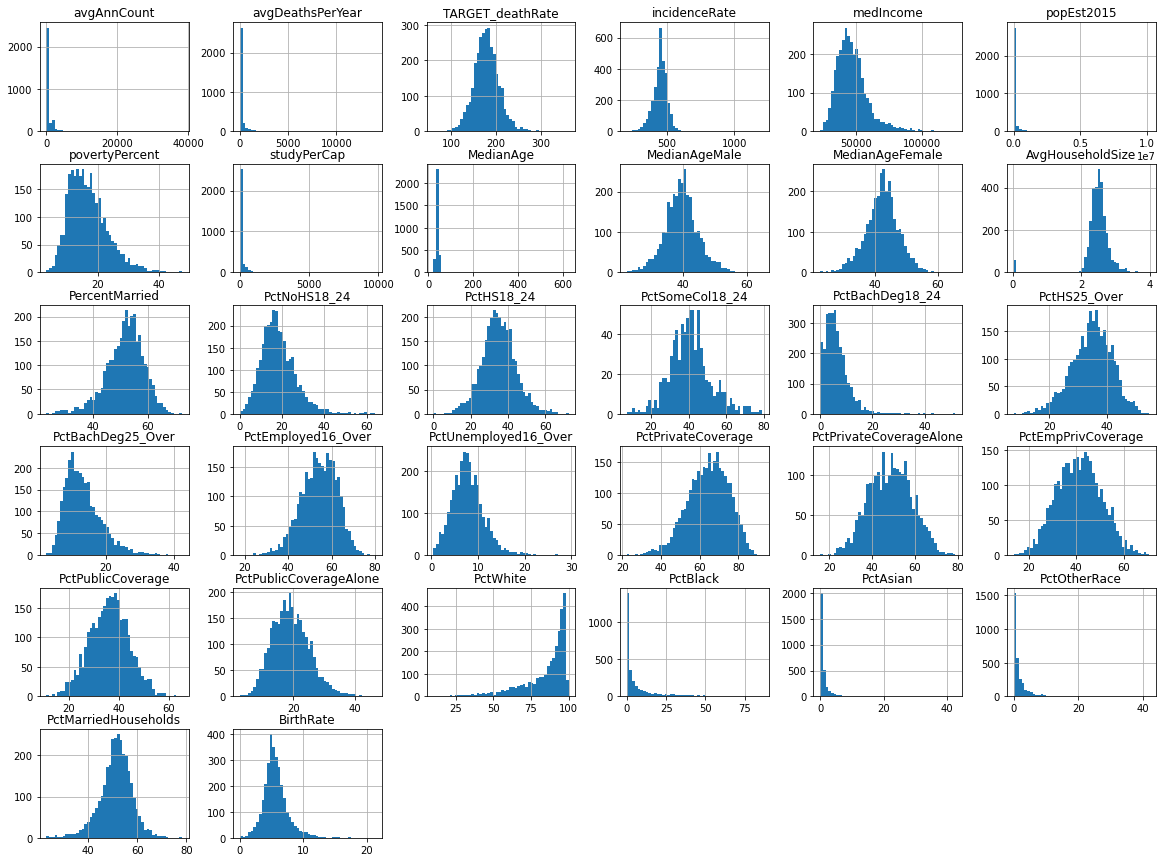

In [5]:
# visualize variables with histograms to aid in pattern recognition
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

Some things to notice:
1. Some variables are **tail-heavy** which can affect some ML algorithms and may need transformation later on.

<a name="TestSet"> </a>
# 4. Create a Test Set

1. Random sampling methods, e.g. *train_split_test*, are generally good for large datasets. If not, **sampling bias** might be introduced.
2. Stratified sampling methods may be a better alternative for smaller datasets in order to mantain the sample's ratio.

In [6]:
# create a stratified split based on binnedInc
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['binnedInc']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

<a name="EDA"> </a>
# 5. Exploratory Data Analysis (EDA)

In [7]:
# create a copy of the stratified training data to ensure that nothing goes wrong with the original
mortality = strat_train_set.copy()

In [8]:
# checking correlations
corr_matrix = mortality.corr()

# check the relationship of the attributes with the target
corr_matrix["TARGET_deathRate"].sort_values(ascending=False)

TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.462957
povertyPercent             0.444469
incidenceRate              0.443052
PctPublicCoverage          0.419498
PctHS25_Over               0.399263
PctUnemployed16_Over       0.393034
PctBlack                   0.277277
PctHS18_24                 0.262823
PctNoHS18_24               0.120947
MedianAgeFemale            0.023513
MedianAge                  0.009291
studyPerCap               -0.015193
MedianAgeMale             -0.019554
AvgHouseholdSize          -0.054871
avgDeathsPerYear          -0.094410
BirthRate                 -0.101254
popEst2015                -0.122593
avgAnnCount               -0.144824
PctOtherRace              -0.186822
PctWhite                  -0.192432
PctAsian                  -0.192501
PctSomeCol18_24           -0.229421
PercentMarried            -0.279336
PctEmpPrivCoverage        -0.282170
PctBachDeg18_24           -0.298766
PctMarriedHouseholds      -0.312147
PctPrivateCoverageAlone   -0

<AxesSubplot:>

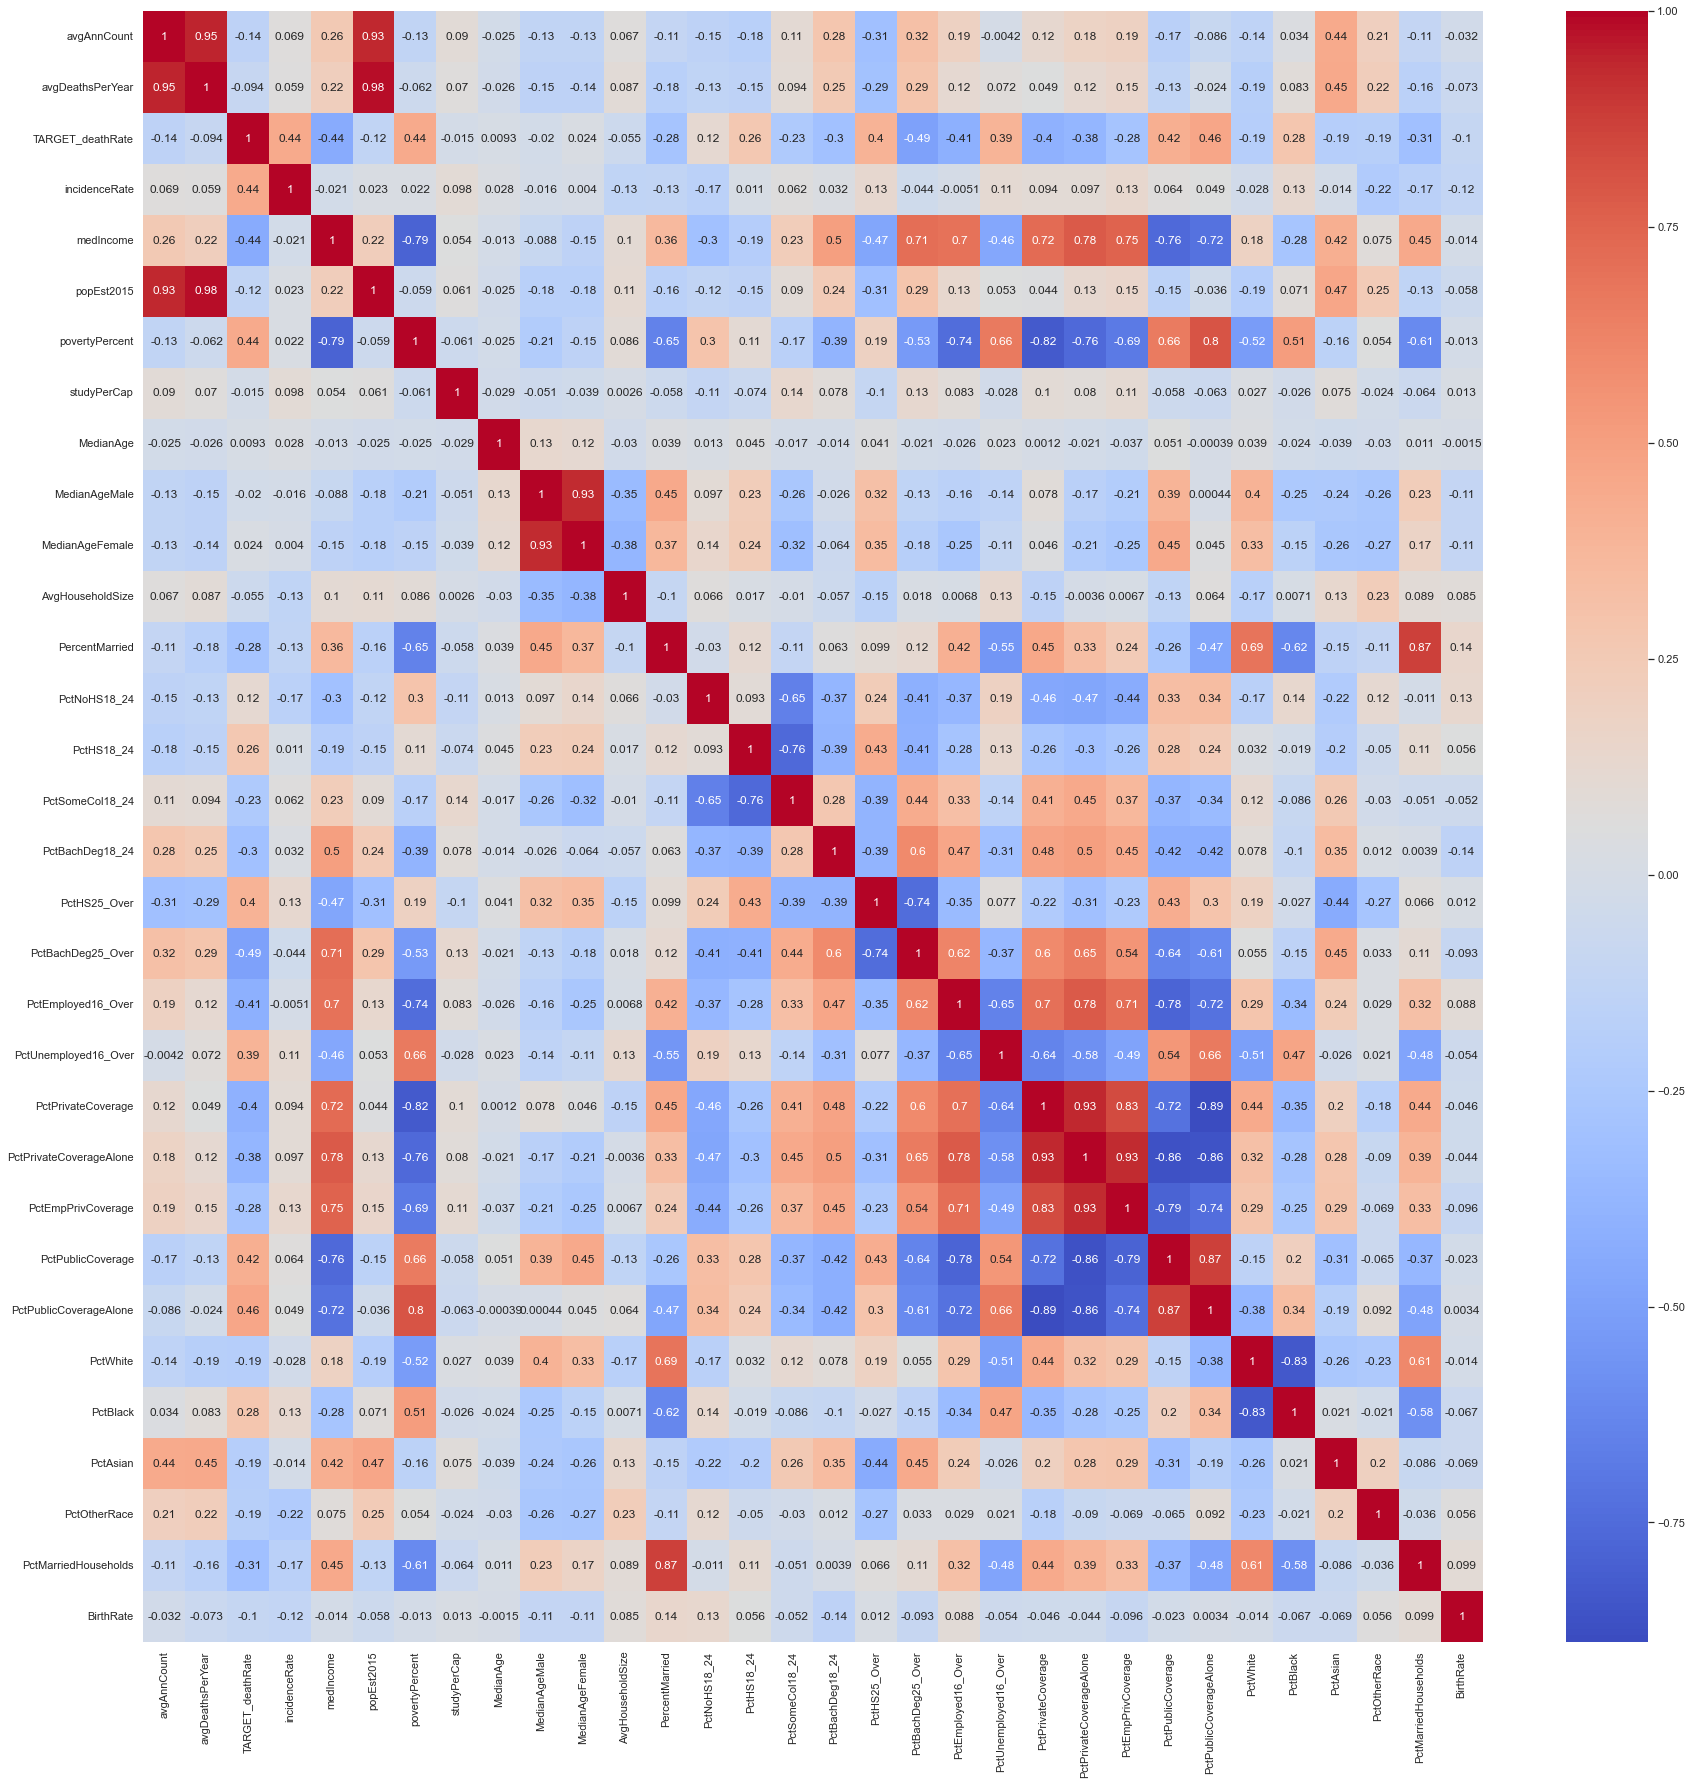

In [9]:
# visualize the corr_matrix as a heatmap
import seaborn as sns

# set figure size
sns.set(rc={'figure.figsize':(30,30)})
# generate a heatmap
sns.heatmap(mortality.corr(), annot=True,cmap='coolwarm')

From the **correlation matrix** and/or **heatmap** above we can see that:
1. there is **no multi-collinearity** (= high relationship between pairs of independent variables), which is good.
2. *studyPerCap* (-0.022), *MedianAge* (0.0044), *MedianAgeMale*(-0.022), *MedianAgeFemale* (0.012), *AvgHouseholdSize* (-0.037) have almost no linear relationship with our target variable, thus, we might try removing them.

array([[<AxesSubplot:xlabel='TARGET_deathRate', ylabel='TARGET_deathRate'>,
        <AxesSubplot:xlabel='medIncome', ylabel='TARGET_deathRate'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='TARGET_deathRate'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='TARGET_deathRate'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='TARGET_deathRate'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='TARGET_deathRate'>],
       [<AxesSubplot:xlabel='TARGET_deathRate', ylabel='medIncome'>,
        <AxesSubplot:xlabel='medIncome', ylabel='medIncome'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='medIncome'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='medIncome'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='medIncome'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='medIncome'>],
       [<AxesSubplot:xlabel='TARGET_deathRate', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='medIncome', ylabel='PctBachDeg25

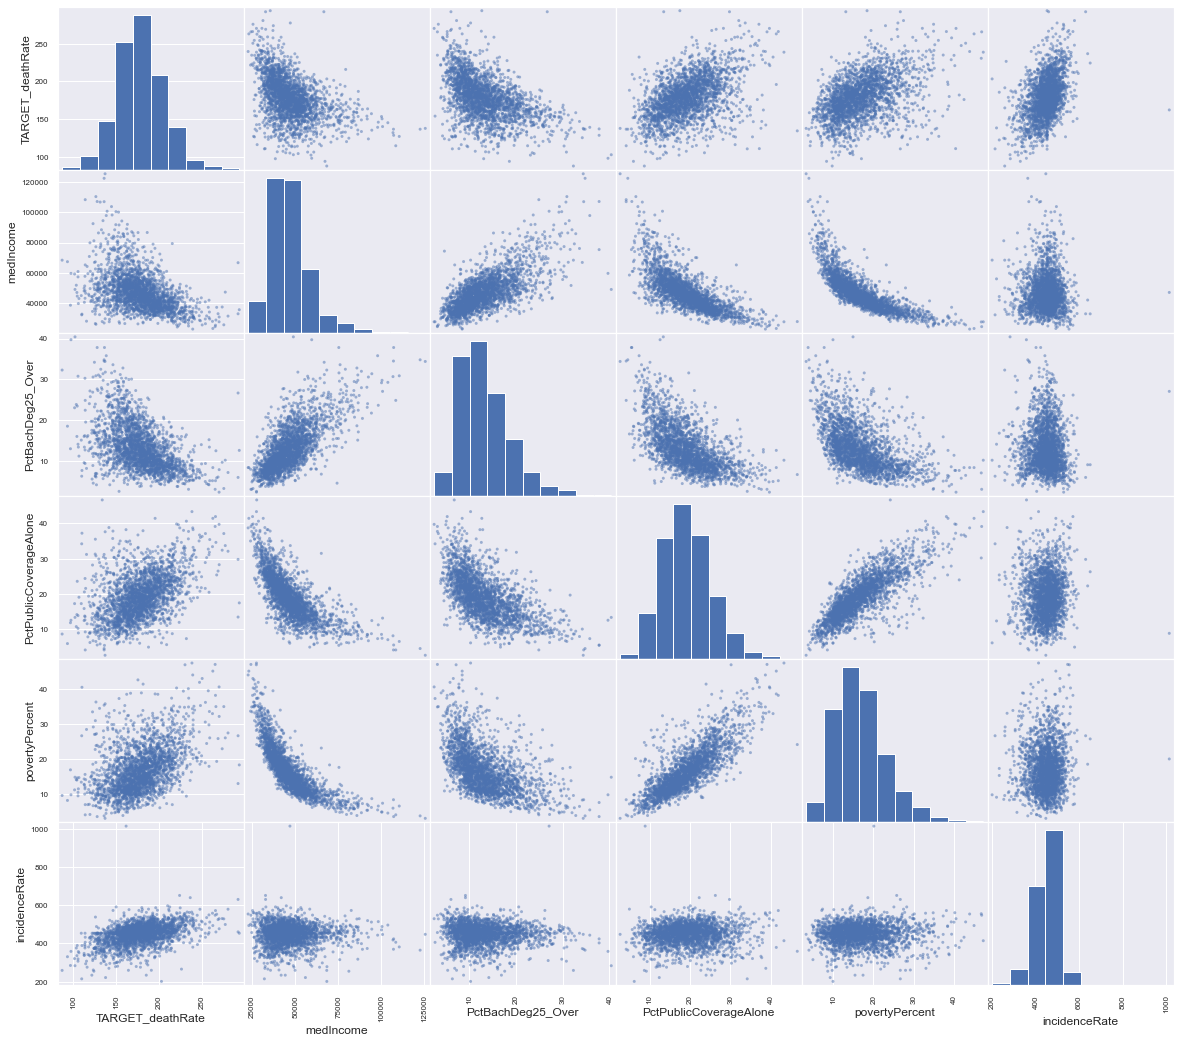

In [10]:
# take a closer look at the "promising" variables
from pandas.plotting import scatter_matrix

attributes = ["TARGET_deathRate", "medIncome", "PctBachDeg25_Over", "PctPublicCoverageAlone", "povertyPercent", "incidenceRate"]
scatter_matrix(mortality[attributes], figsize=(20,18))

<a name="DataCleaning"> </a>
# 6. Data Cleaning

We will try to address our observations so far:
1. Missing values
2. Variables with low relationship with the target variable
3. Duplicate values
4. Categorical Variables
5. Feature Scaling

In [11]:
# create another fresh copy of the original dataset while splitting features and label
mortality = strat_train_set.drop("TARGET_deathRate", axis=1)
mortality_labels = strat_train_set["TARGET_deathRate"].copy()

In [12]:
# check missing values per column
mortality.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1828
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          123
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     484
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

We generally have 3 options for dealing with missing values:
1. Get rid of the whole attribute.
2. Get rid of the rows.
3. Set the values to some value (zero, mean, median, etc.).

In [13]:
# create a subset of the dataframe with the columns that have NaNs
mortality[["PctPrivateCoverageAlone", "PctEmployed16_Over", "PctSomeCol18_24"]].head(20)

,PctPrivateCoverageAlone,PctEmployed16_Over,PctSomeCol18_24
1910,42.3,35.3,NaN
761,57.6,61.9,NaN
2776,NaN,69.5,71.8
2086,45.5,58.7,NaN
1636,NaN,NaN,NaN
945,NaN,66.2,NaN
1149,NaN,56.9,NaN
265,54.9,53.1,NaN
960,66.1,74.4,NaN
1733,54.0,60.2,NaN


1. I think it is fair to **remove** the *PctSomeCol18_24* attribute entirely since it has 1028 missing values, almost 1/3 of the dataset.
2. I think it is worth replacing the other 2 columns with the median value of each attribute.

There was at least one typo on the *MedianAge* attribute, so let's inspect it closer.

In [14]:
# check MedianAge attribute for more typos
mortality['MedianAge'].sort_values().tail(50)

354      53.2
319      53.3
2296     53.3
477      53.4
1991     53.5
1073     53.5
2079     53.7
1484     54.0
1945     54.1
1029     54.5
325      54.5
124      54.7
2740     54.8
1431     55.4
207      55.6
298      55.6
349      55.6
185      55.6
1905     56.3
1059     56.4
1694     56.5
1106     56.6
160      57.1
1486     65.3
2789    349.2
1406    406.8
843     412.8
2391    414.0
1199    424.8
2431    429.6
100     458.4
181     469.2
1736    496.8
2668    496.8
2895    498.0
637     498.0
2422    500.4
2589    501.6
1725    502.8
2966    508.8
425     508.8
2835    511.2
1767    519.6
2000    523.2
1744    525.6
1312    535.2
1855    536.4
1579    579.6
606     619.2
318     624.0
Name: MedianAge, dtype: float64

There are a lot of typos on that column. In general, it might be worth fixing the typos instead of removing it, but since both the attributes *MedianAgeMale* and *MedianAgeFemale* have extremely low relationships with the target variable, I think that it would be better to remove them all together.

In addition, *studyPerCap* has extremely low relationship with the target variable and quite a bizzare structure. Since, I can't extract any more information about what it represents and I lack the domain knowledge to judge myself if its structure is due to an entry error or it is normal, I will also remove it.

In [15]:
# remove the desired columns
mortality.drop(columns=['PctSomeCol18_24', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize'],
               axis=1, inplace=True)

# check they they were removed
mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 1910 to 2707
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   medIncome                2437 non-null   int64  
 4   popEst2015               2437 non-null   int64  
 5   povertyPercent           2437 non-null   float64
 6   binnedInc                2437 non-null   object 
 7   Geography                2437 non-null   object 
 8   PercentMarried           2437 non-null   float64
 9   PctNoHS18_24             2437 non-null   float64
 10  PctHS18_24               2437 non-null   float64
 11  PctBachDeg18_24          2437 non-null   float64
 12  PctHS25_Over             2437 non-null   float64
 13  PctBachDeg25_Over        2437 non-null   float64
 14  PctEmployed16_Over   

In [16]:
# fill PctPrivateCoverageAlone and PctEmployed16_Over missing values with the median
from sklearn.impute import SimpleImputer

# create an instance using median
imputer = SimpleImputer(strategy="median")

# the imputer can be applied only to numerical variables
mortality_num = mortality.drop(columns=["binnedInc", "Geography"], axis=1)

# check that we have only numerical variables 
print(mortality_num.info())

# fit the imputer
imputer.fit(mortality_num)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2437 entries, 1910 to 2707
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2437 non-null   float64
 1   avgDeathsPerYear         2437 non-null   int64  
 2   incidenceRate            2437 non-null   float64
 3   medIncome                2437 non-null   int64  
 4   popEst2015               2437 non-null   int64  
 5   povertyPercent           2437 non-null   float64
 6   PercentMarried           2437 non-null   float64
 7   PctNoHS18_24             2437 non-null   float64
 8   PctHS18_24               2437 non-null   float64
 9   PctBachDeg18_24          2437 non-null   float64
 10  PctHS25_Over             2437 non-null   float64
 11  PctBachDeg25_Over        2437 non-null   float64
 12  PctEmployed16_Over       2314 non-null   float64
 13  PctUnemployed16_Over     2437 non-null   float64
 14  PctPrivateCoverage   

SimpleImputer(strategy='median')

In [17]:
# confirm the values
imputer.statistics_ == mortality_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [18]:
# replace NaNs with median values
X = imputer.transform(mortality_num)

# convert numpy array to pandas dataframe
mortality_trans = pd.DataFrame(X, columns=mortality_num.columns,
                              index=mortality_num.index)

# check for missing values
print(mortality_trans.isna().sum())

# print the first 5 rows
mortality_trans.head()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64


,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1910,60.0,26.0,403.0,39030.0,14065.0,21.5,43.3,40.8,35.5,1.9,...,42.3,38.1,37.4,18.7,74.121983,18.738257,0.325192,2.919497,50.327590,8.393502
761,828.0,285.0,470.6,58291.0,175989.0,11.3,55.6,14.0,35.1,9.0,...,57.6,49.4,30.0,17.5,88.666631,6.919463,1.271644,1.194413,56.951542,5.056955
2776,110.0,45.0,415.4,52930.0,33897.0,14.1,42.2,1.7,17.3,9.3,...,48.8,56.1,20.1,9.7,92.737396,1.295164,2.868728,0.602191,45.444219,4.882440
2086,10502.0,3405.0,435.2,56866.0,2339150.0,15.4,45.3,13.6,23.5,15.1,...,45.5,40.9,37.4,26.5,41.146319,18.479110,24.384794,12.151808,44.720000,4.844911
1636,363.0,131.0,514.7,46908.0,61061.0,15.1,52.3,12.3,31.8,3.1,...,48.8,47.7,32.0,17.2,96.464166,1.054029,0.360632,0.155727,53.829254,5.615629


In [19]:
# check for duplicate values
mortality_trans.duplicated().sum()

0

Deal with **categorical attributes**: *binnedInc* and *Geography*.

In [20]:
# inspect the two variables
mortality[["binnedInc", "Geography"]]

,binnedInc,Geography
1910,"(37413.8, 40362.7]","Madison County, Texas"
761,"(54545.6, 61494.5]","Sumner County, Tennessee"
2776,"(51046.4, 54545.6]","Brookings County, South Dakota"
2086,"(54545.6, 61494.5]","Queens County, New York"
1636,"(45201, 48021.6]","Knox County, Ohio"
...,...,...
1509,"(51046.4, 54545.6]","Grady County, Oklahoma"
498,"(51046.4, 54545.6]","Towner County, North Dakota"
2136,"(42724.4, 45201]","Davidson County, North Carolina"
1481,"(40362.7, 42724.4]","St. Lucie County, Florida"


In [21]:
# check how many categories there are on Geography column
mortality["Geography"].unique().sum()

"Madison County, TexasSumner County, TennesseeBrookings County, South DakotaQueens County, New YorkKnox County, OhioFranklin County, VermontPrice County, WisconsinLynchburg city, VirginiaArlington County, VirginiaLebanon County, PennsylvaniaLeflore County, MississippiHaskell County, TexasLawrence County, PennsylvaniaLancaster County, VirginiaWalton County, GeorgiaAthens County, OhioWoods County, OklahomaBronx County, New YorkPratt County, KansasClark County, KentuckyMenard County, TexasPasco County, FloridaBenton County, MinnesotaGrundy County, IllinoisLarimer County, ColoradoDade County, MissouriSherman County, OregonRichmond County, North CarolinaFisher County, TexasRefugio County, TexasAllen County, IndianaMcKean County, PennsylvaniaBoone County, KentuckyNicholas County, West VirginiaAlbany County, New YorkHawkins County, TennesseeOtsego County, MichiganWayne County, North CarolinaVernon Parish, LouisianaGrant County, ArkansasGiles County, TennesseeNez Perce County, IdahoWayne Count

In [22]:
# check how many categories there are on binnedInc column
mortality["binnedInc"].unique().sum()

'(37413.8, 40362.7](54545.6, 61494.5](51046.4, 54545.6](45201, 48021.6](40362.7, 42724.4](61494.5, 125635][22640, 34218.1](34218.1, 37413.8](42724.4, 45201](48021.6, 51046.4]'

We will need to convert these categorical variables into numerical format. Usually we do it via the use of:
1. **Ordinal Encoding**
2. **One-Hot Encoding**

The former makes the assumption that two nearby values are more similar than two distant values, which does not fit this case. Hence, we will use the latter method.


In [23]:
# convert object to numerical using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# make a subset with just the two variables
mortality_cat = mortality[['binnedInc', 'Geography']]

# create an instance of OneHotEncoder
cat_encoder = OneHotEncoder()
# fit categorical variables to encoder
mortality_cat_1hot = cat_encoder.fit_transform(mortality_cat)

# convert sparse matrix to dense numpy array
mortality_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:
# create a pipeline for adding Standardization
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create a pipeline for the numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
  
# fit the pipeline to numerical attributes
mortality_num_tr = num_pipeline.fit_transform(mortality_num)

In [25]:
# create a pipeline for both num and cat variables
from sklearn.compose import ColumnTransformer

# create a list with just the numerical variables
num_attribs = list(mortality_num)
# create a list with just the categorical variables
cat_attribs = ["binnedInc", "Geography"]

# create a pipeline to handle both the numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
])

# fit the pipeline to the dataset
mortality_prepared = full_pipeline.fit_transform(mortality)

<a name="SelectTrainModel"> </a>
# 7. Select and Train a Model

Usually it is worth it to try various models and compare their performance. I chose to experiment with:
1. **Linear Regression**: simple and effective model with linear data and regression problems.
2. **Decision Tree**: usually used for classification tasks, but can be effective as regressors as well. Due to their high-interpretability even from non-technical audiences, it is almost always worth a try!
3. **Random Forest**: in case Decision Tree performs reasonably well, most probably a RF will perform even better!

I would also experiment with SVM and MLP, but since this is an exercice to demonstrate the basic ML workflow, I believe 3 models are a good choice.

In [26]:
# start with a linear regression model
from sklearn.linear_model import LinearRegression

# create an instance
lin_reg = LinearRegression()

# fit the instance to the training set
lin_reg.fit(mortality_prepared, mortality_labels)

LinearRegression()

In [27]:
# check its predictions on training set instances

# select a subset of the training data
some_data = mortality.iloc[:5]

# select the corresponding labels
some_labels = mortality_labels[:5]

# fit the selected features to the pipeline
some_data_prepared = full_pipeline.transform(some_data)

# print predictions and actual labels
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [165.29991276 162.50000288 162.59999238 138.80005865 179.499975  ]
Labels: [165.3, 162.5, 162.6, 138.8, 179.5]


In [28]:
# measure MAE and RMSE on the whole training set
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# use the whole training set to predict
mortality_predictions = lin_reg.predict(mortality_prepared)

# calculate MAE and RMSE
lin_mae = mean_absolute_error(mortality_labels, mortality_predictions)
lin_mse = mean_squared_error(mortality_labels, mortality_predictions)
lin_rmse = np.sqrt(lin_mse)

# print MAE and RMSE values
print("MAE:", lin_mae)
print("RMSE:", lin_rmse)

MAE: 3.609555152543426e-05
RMSE: 4.9152049461886734e-05


In [29]:
# try a Decision Tree
from sklearn.tree import DecisionTreeRegressor

# create an instance
tree_reg = DecisionTreeRegressor()

# fit training data
tree_reg.fit(mortality_prepared, mortality_labels)

# predict on training data
mortality_predictions = tree_reg.predict(mortality_prepared)

# calculate MAE and RMSE
tree_mae = mean_absolute_error(mortality_labels, mortality_predictions)
tree_mse = mean_squared_error(mortality_labels, mortality_predictions)
tree_rmse = np.sqrt(tree_mse)

# print MAE and RMSE values
print("MAE:", tree_mae)
print("RMSE:", tree_rmse)

MAE: 0.0
RMSE: 0.0


The above results are probably an indication of **overfitting**. We can check with using **Cross-Validation**.

In [30]:
from sklearn.model_selection import cross_validate

# cross-validate dataset with multiple metrics
scores = cross_validate(tree_reg, mortality_prepared, mortality_labels,
                       scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
                       cv=10)

# extract, calculate and print mean MAE and mean RMSE values
tree_cv_mae = np.mean(-scores["test_neg_mean_absolute_error"])
print("Mean CV MAE:", round(tree_cv_mae, 4))
tree_cv_mse = np.mean(-scores["test_neg_mean_squared_error"])
tree_cv_rmse = np.sqrt(tree_cv_mse)
print("Mean CV RMSE:", round(tree_cv_rmse, 4))

Mean CV MAE: 19.2734
Mean CV RMSE: 25.6214


In [31]:
# define a function to look at the mean and standard deviation values
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [58]:
# extract and print MAE score
print("Decision Tree MAE:")
display_scores((-scores["test_neg_mean_absolute_error"]))

# extract and print RMSE score
print("\nDecision Tree RMSE:")
display_scores(np.sqrt(-scores["test_neg_mean_squared_error"]))

Decision Tree MAE:
Mean: 19.27341867368279
Standard deviation: 0.954313755247594

Decision Tree RMSE:
Mean: 25.596114430968683
Standard deviation: 1.1378473221658454


In [59]:
# cross-validate linear regression model
lin_scores = cross_validate(lin_reg, mortality_prepared, mortality_labels,
                       scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
                       cv=10)

# extract and print MAE score
print("Linear Regression MAE:")
display_scores((-lin_scores["test_neg_mean_absolute_error"]))

# extract and print RMSE score
print("\nLinear Regression RMSE:")
display_scores(np.sqrt(-lin_scores["test_neg_mean_squared_error"]))

Linear Regression MAE:
Mean: 14.213534669854866
Standard deviation: 0.8475720681630962

Linear Regression RMSE:
Mean: 19.22614878472895
Standard deviation: 1.364017311748226


In [57]:
# try one last model: RandomForest
from sklearn.ensemble import RandomForestRegressor

# create an instance
forest_reg = RandomForestRegressor()

# fit the training data
forest_reg.fit(mortality_prepared, mortality_labels)

# cross-validate dataset with multiple metrics
forest_scores = cross_validate(forest_reg, mortality_prepared, mortality_labels,
                       scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
                       cv=10)

# extract and print MAE score
print("Random Forest MAE:")
display_scores((-forest_scores["test_neg_mean_absolute_error"]))

# extract and print RMSE score
print("\nRandom Forest RMSE:")
display_scores(np.sqrt(-forest_scores["test_neg_mean_squared_error"]))

Scores for Random Forest:
Mean: 13.668950716791471
Standard deviation: 0.8745531437476464

Scores for Random Forest RMSE:
Mean: 18.436689030310582
Standard deviation: 1.245127682470218


<a name="GS"> </a>
# 8. Hyperparameter Optimization

In [35]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters
param_grid = [
    {'n_estimators': [3, 10, 30, 40, 60, 80, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40, 60, 80, 100], 'max_features': [2, 3, 4]}
]

# create an instance
forest_reg = RandomForestRegressor()

# set gridsearch hyperparameters
gs = GridSearchCV(forest_reg, param_grid, cv=5,
                 scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                 return_train_score=True, refit='neg_mean_absolute_error')

# fit gs to the data
gs.fit(mortality_prepared, mortality_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 60, 80, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30, 40, 60, 80, 100]}],
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'])

In [36]:
# find out the best estimator
gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4)

Analyze the best model and its errors.

In [46]:
# find the most import features
feature_importances = gs.best_estimator_.feature_importances_

# display feature importances with their attributes
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True) 

# evaluate and drop features if needed

[(0.05057050454506848, 'incidenceRate'),
 (0.03856002824142208, 'PctBachDeg25_Over'),
 (0.03796687290230677, 'PctHS25_Over'),
 (0.03721374216072313, 'PctPrivateCoverage'),
 (0.03615970069907384, 'povertyPercent'),
 (0.03313856293506981, 'PctPublicCoverage'),
 (0.03286775241476094, 'medIncome'),
 (0.03282588696780673, 'PctPublicCoverageAlone'),
 (0.029838436722964122, 'PctBlack'),
 (0.028316947595945198, 'avgDeathsPerYear'),
 (0.02764575868601271, 'PctUnemployed16_Over'),
 (0.02750037396925158, 'PctOtherRace'),
 (0.027142789960055924, 'PctMarriedHouseholds'),
 (0.026742933899080164, 'PercentMarried'),
 (0.026275195233419493, 'PctPrivateCoverageAlone'),
 (0.024972336189914335, 'PctHS18_24'),
 (0.024693490371273517, 'popEst2015'),
 (0.02449931940131211, 'avgAnnCount'),
 (0.02445505912232946, 'PctEmployed16_Over'),
 (0.024115327958978514, 'PctEmpPrivCoverage'),
 (0.02359006969280377, 'PctWhite'),
 (0.023463401244776225, 'PctBachDeg18_24'),
 (0.021899397477345442, 'PctAsian'),
 (0.020188335

We can see that all *binnedInc* categories have no linear relationship with the target variable.

<a name="TestSetEval"> </a>
# 9. Evaluate on the Test Set

In [53]:
# select the model with the best hyperparameters
final_model = gs.best_estimator_

# drop the required features
X_test = strat_test_set.drop(columns=['TARGET_deathRate', 'PctSomeCol18_24',
                                      'studyPerCap', 'MedianAge', 'MedianAgeMale',
                                      'MedianAgeFemale', 'AvgHouseholdSize'], axis=1)

# assign the target variable
y_test = strat_test_set["TARGET_deathRate"].copy()

# perform the required transformation to the testing training set
X_test_prepared = full_pipeline.transform(X_test)

# predict with the test data
final_predictions = final_model.predict(X_test_prepared)

# calculate MAE and RMSE for test data
final_mae = mean_absolute_error(y_test, final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# print MAE and RMSE values
print("MAE:", final_mae)
print("RMSE: ", final_rmse)

MAE: 15.978036065573768
RMSE:  22.13809299626947


The model performs exceptionally well, but to be more confident on what to expect we can also calculate the **Confidence Intervals** for both metrics.

In [39]:
# calculate 95% confidence intervals
from scipy import stats
confidence = 0.95

# 95% CI for MAE
absolute_errors = abs(final_predictions - y_test)
ci_mae = stats.t.interval(confidence, len(absolute_errors) -1,
                loc=absolute_errors.mean(),
                scale=stats.sem(absolute_errors))

# 95% CI for RMSE
squared_errors = (final_predictions - y_test) ** 2
ci_mse = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

# print the 95% CI for both metrics
print("95% confidence interval for MAE:", ci_mae)
print("\n95% confidence interval for MSE:", ci_mse)


95% confidence interval for MAE: (14.758624878639807, 17.197447252507782)

95% confidence interval for MSE: [19.58019413 24.42961974]


<a name="Conclusions"> </a>
# 10. Conclusions

1. The **RandomForest** model outperforms both Linear Regression (by a small margin) and the Decision Tree (by a lot).


2. To improve futher our scores, we could try:  
    * apply a **dimensionality reduction** algorithm such as LDA.
    * **more hyperparameter combinations** with GridSearchCV on the same model (RF).
    * more models such as **Support Vector Machine**, **Multi-Layer Percepton**, etc.
    * **removing *binnedInc* feature** that has low linear relationship with the target variable which was revealed by the *feature_importance_* method.  
    
    
3. I did not try to perform any **feature engineering** with this dataset for two reasons:
    * I lack the **domain knowledge** to generate new meaningful features.
    * I had no information, i.e. **no metadata**, on what the features represent and I did not want to experiment blindly.